# Rotating MRIs

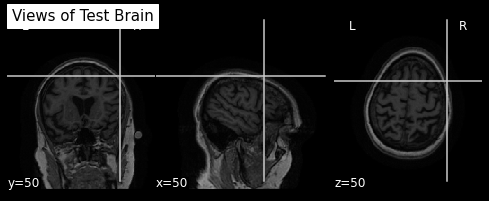

In [138]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import math
import os
img = nib.load(r"C:\Users\mayap\BSI Internship\005_S_1341_F-73.nii")
arr = img.get_fdata()
top_slic = arr[100,:,:]
from nilearn.plotting import view_img, plot_glass_brain, plot_anat, plot_epi
plot_anat(img,(50,50,50),title="Views of Test Brain")

**Part One:** Successfully Rotating In First Use Case

Euler angles are (1.5710582417978771, -1.4139783373838273, -1.5707961076284849).


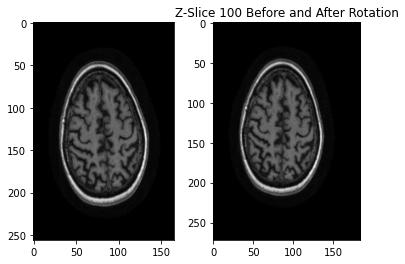

In [182]:
# imports
from nibabel.affines import from_matvec
from nibabel.affines import to_matvec
from nibabel.affines import apply_affine
from nilearn.image import resample_img
from nibabel.eulerangles import mat2euler
import pandas as pd

# sub-alignment functions, each given one value
def x_rotate(orig_arr,x_rot):
    arr = np.array([[1,0,0],
                      [0,np.cos(x_rot),-np.sin(x_rot)],
                      [0,np.sin(x_rot),np.cos(x_rot)]])
    arr = from_matvec(arr)
    return arr.dot(orig_arr)

def y_rotate(orig_arr,y_rot):
    arr = np.array([[np.cos(y_rot),0,np.sin(y_rot)],
                      [0,1,0],
                      [-np.sin(y_rot),0,np.cos(y_rot)]])
    arr = from_matvec(arr)
    return arr.dot(orig_arr)

def z_rotate(orig_arr,z_rot):
    arr = np.array([[np.cos(z_rot),-np.sin(z_rot),0],
                      [np.sin(z_rot),np.cos(z_rot),0],
                      [0,0,1]])
    arr = from_matvec(arr)
    return arr.dot(orig_arr)

# condense into one function
def rotate_mri(img,x_rot,y_rot,z_rot,slice_num):
    # get original array, affine, & sample
    arr_data = img.get_fdata()
    ref_affine = img.affine
    sample_slice = arr_data[slice_num,:,:]
    # modify the affine
    new_affine = x_rotate(ref_affine,x_rot)
    new_affine = y_rotate(new_affine,y_rot)
    new_affine = z_rotate(new_affine,z_rot)
    mat, vec = to_matvec(new_affine)
    angles = mat2euler(mat)
    print(f"Euler angles are {angles}.")
    # create new image with resample
    rotated = resample_img(img,new_affine)
    arr_data_2 = rotated.get_fdata()
    # visualize the difference
    sample_slice_2 = arr_data_2[slice_num,:,:]
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(sample_slice,cmap="gray")
    ax[1].imshow(sample_slice_2,cmap="gray")
    plt.title(f"Z-Slice {slice_num} Before and After Rotation")
    # TODO - should write a CSV with Euler angle values
    return rotated

# test
new_image = rotate_mri(img,0,0,-math.pi/20,100)

In [164]:
# Save to view in ITK - Snap
folder_path = r"C:\Users\mayap\BSI Internship"
new_fpath = os.path.join(folder_path,"rotated2.nii")
nib.save(new_image,new_fpath)

**Part Two:** Value Search

Euler angles are (1.5709271760370656, 1.5705346835242335, -1.570665505382291).
Euler angles are (1.5710578094837067, 1.413455050846979, -1.5707961083513948).
Euler angles are (1.5710579200014534, 1.2563754181674913, -1.570796216118128).
Euler angles are (1.5710579581266055, 1.0992957854880023, -1.5707962514387481).
Euler angles are (1.571057978179103, 0.942216152808513, -1.5707962685827845).
Euler angles are (1.5710579910568407, 0.7851365201290237, -1.570796278401089).
Euler angles are (1.5710580004146553, 0.628056887449534, -1.570796284494132).
Euler angles are (1.5710580078420118, 0.47097725477004454, -1.5707962883844255).
Euler angles are (1.5710580141607626, 0.313897622090555, -1.570796290807936).
Euler angles are (1.5710580198615136, 0.15681798941106545, -1.5707962921411267).
Euler angles are (1.571058025283711, -0.0002616432684241053, -1.5707962925663537).
Euler angles are (1.5710580307063577, -0.1573412759479137, -1.5707962921382543).
Euler angles are (1.5710580364085507, -0.314

<ipython-input-182-336373f40328>:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,2)


Euler angles are (-1.5705348441060867, -1.4134550508469792, 1.5707961083513948).
Euler angles are (-1.5705347335883397, -1.2563754181674915, 1.570796216118128).
Euler angles are (-1.5705346954631878, -1.0992957854880026, 1.5707962514387481).
Euler angles are (-1.5705346754106901, -0.9422161528085131, 1.5707962685827845).
Euler angles are (-1.5705346625329526, -0.7851365201290237, 1.570796278401089).
Euler angles are (-1.570534653175138, -0.6280568874495341, 1.570796284494132).
Euler angles are (-1.5705346457477813, -0.4709772547700447, 1.5707962883844255).
Euler angles are (-1.5705346394290307, -0.31389762209055516, 1.570796290807936).
Euler angles are (-1.5705346337282797, -0.15681798941106556, 1.5707962921411267).
Euler angles are (-1.5705346283060824, 0.00026164326842398284, 1.5707962925663537).
Euler angles are (-1.5705346228834356, 0.15734127594791358, 1.5707962921382543).
Euler angles are (-1.5705346171812424, 0.314420908627403, 1.570796290801817).
Euler angles are (-1.5705346108

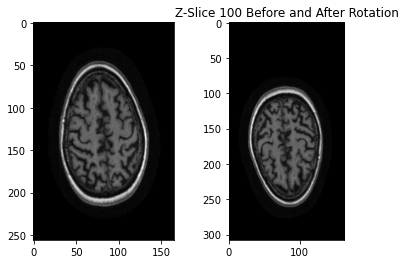

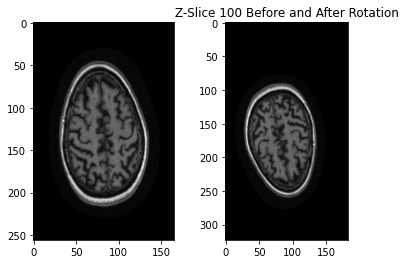

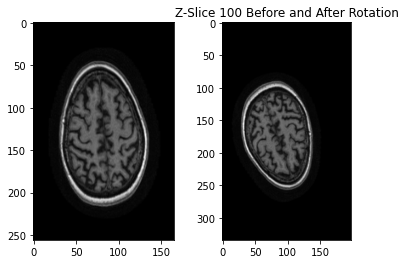

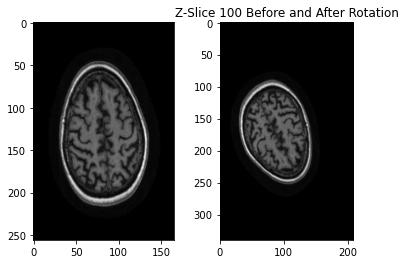

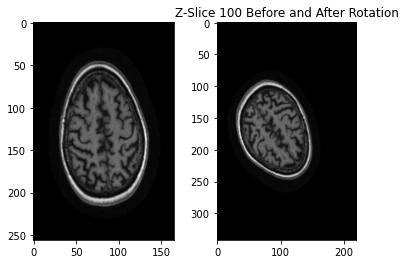

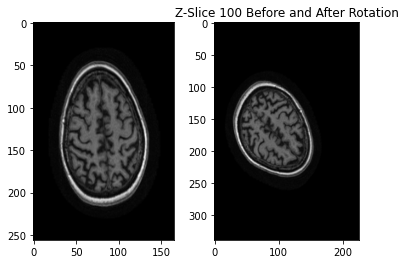

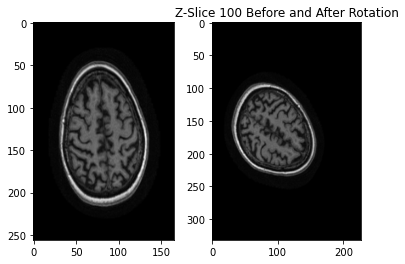

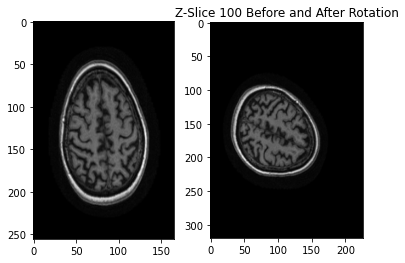

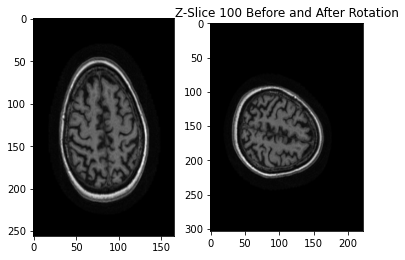

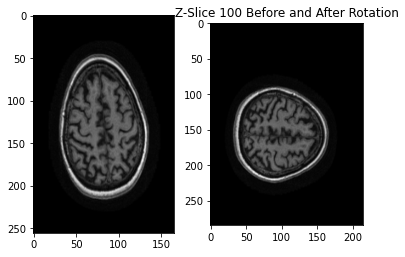

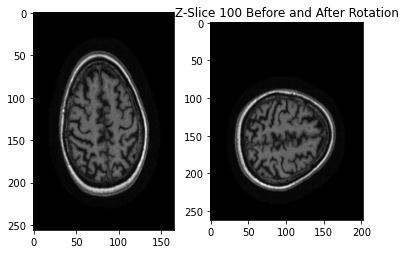

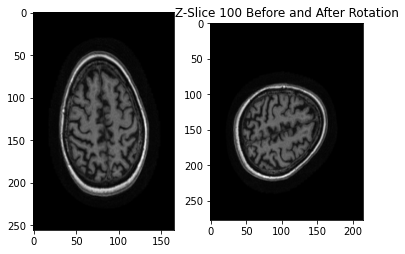

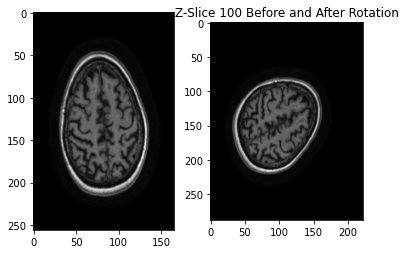

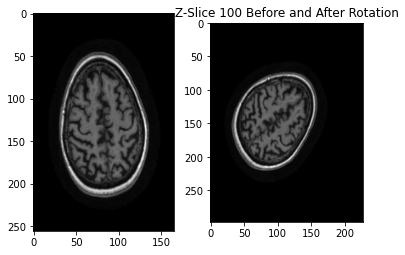

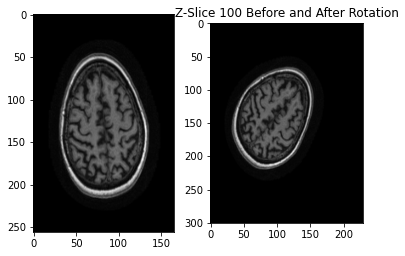

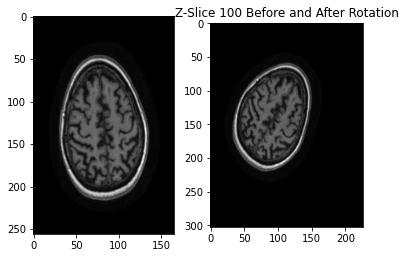

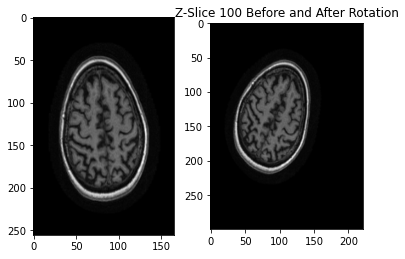

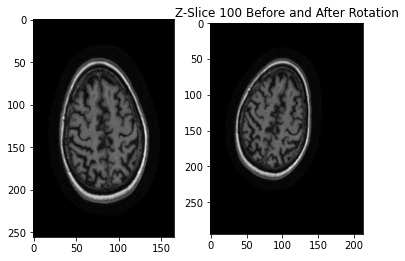

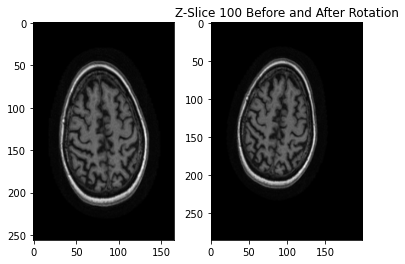

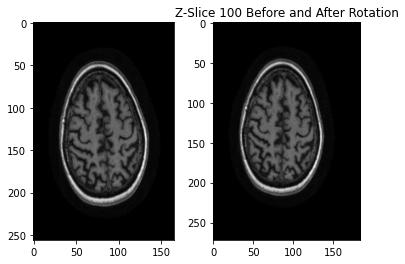

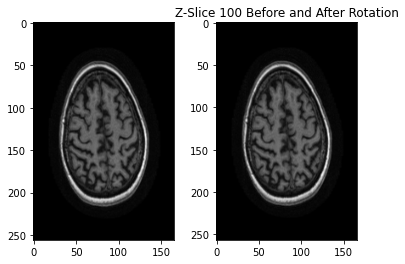

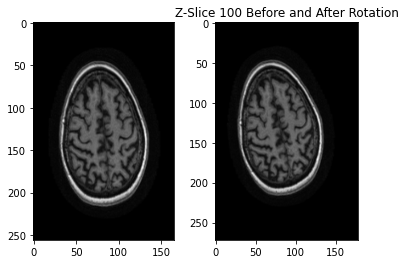

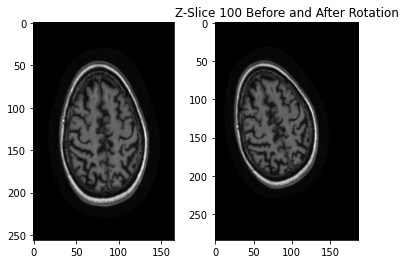

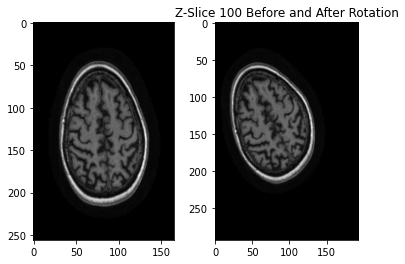

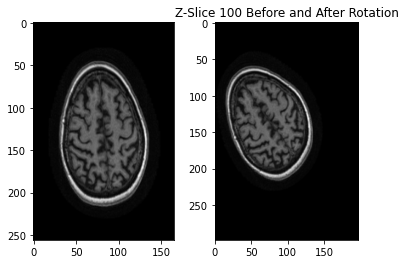

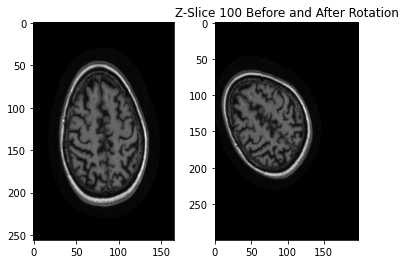

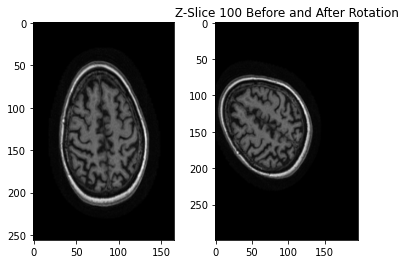

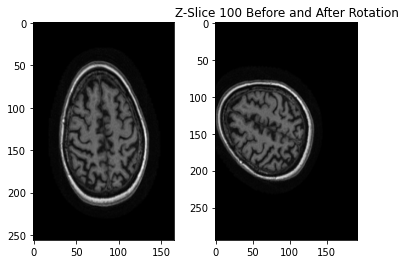

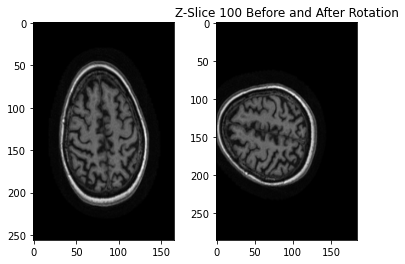

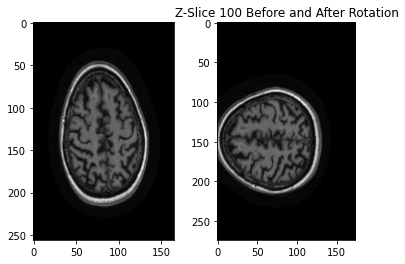

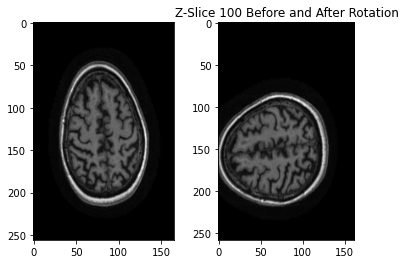

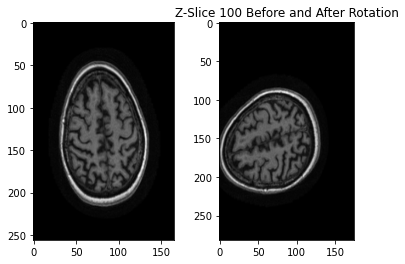

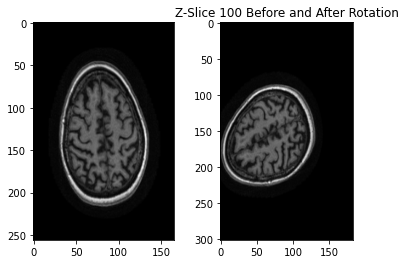

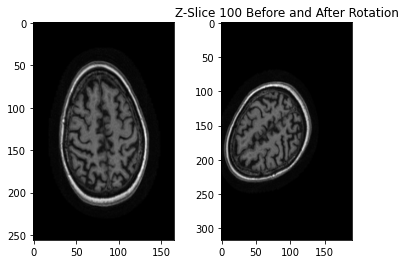

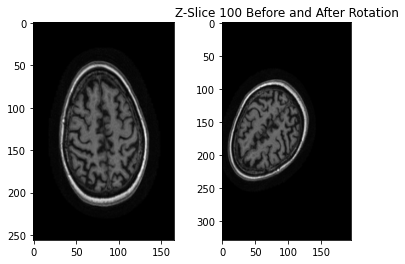

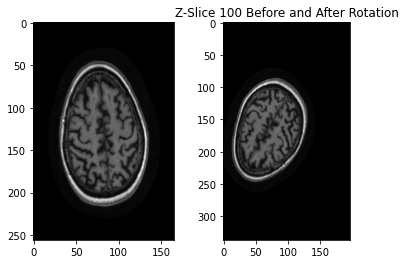

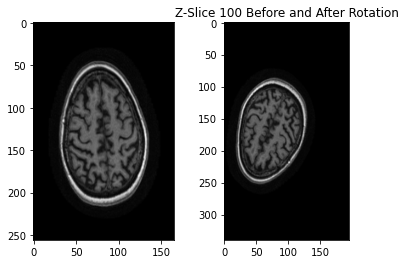

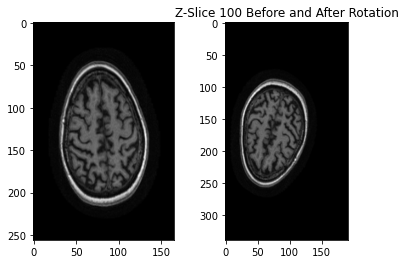

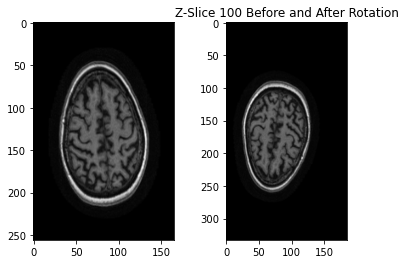

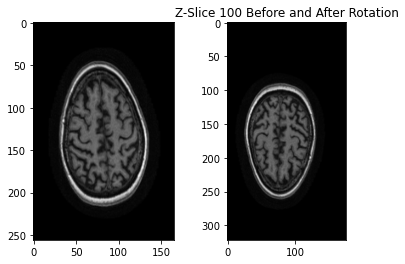

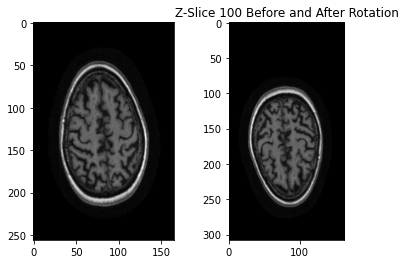

In [195]:
# list of values to search - within two full radians
search_values = np.arange(-math.pi,math.pi+0.1,math.pi/20)
x_search = search_values
y_search = search_values
z_search = search_values
for value in search_values:
    rotate_mri(img,0,0,value,100)

**Part Three:** 